# Exercise 6.4 Supervised Machine Learning: Regression

# Contents

#### 1. Importing libraries and data

#### 2. Data cleaning

#### 3. Data prep for regression analysis

#### 4. Regression analysis 
   

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing Data set
path=r'C:\Users\swati\Employee Termination Analysis'
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_merged.csv'), index_col = False, low_memory = False)

### 2. Data Cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'employee_id', 'terminationdate_key', 'age',
       'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_number', 'gender', 'termreason_desc', 'termtype_desc',
       'year_of_record', 'employment_status', 'business_unit', 'job_category',
       'population', '_merge', 'population_flag', 'age_flag',
       'employ_status_flag', 'Hierarchy'],
      dtype='object')

In [5]:
df.head(20)

,Unnamed: 0,employee_id,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_number,gender,...,year_of_record,employment_status,business_unit,job_category,population,_merge,population_flag,age_flag,employ_status_flag,Hierarchy
0,0,1318,1/1/1900,52,17,Vancouver,Executive,CEO,35,Male,...,2006,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
1,1,1318,1/1/1900,53,18,Vancouver,Executive,CEO,35,Male,...,2007,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
2,2,1318,1/1/1900,54,19,Vancouver,Executive,CEO,35,Male,...,2008,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
3,3,1318,1/1/1900,55,20,Vancouver,Executive,CEO,35,Male,...,2009,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
4,4,1318,1/1/1900,56,21,Vancouver,Executive,CEO,35,Male,...,2010,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
5,5,1318,1/1/1900,57,22,Vancouver,Executive,CEO,35,Male,...,2011,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
6,6,1318,1/1/1900,58,23,Vancouver,Executive,CEO,35,Male,...,2012,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
7,7,1318,1/1/1900,59,24,Vancouver,Executive,CEO,35,Male,...,2013,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
8,8,1318,1/1/1900,60,25,Vancouver,Executive,CEO,35,Male,...,2014,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
9,9,1318,1/1/1900,61,26,Vancouver,Executive,CEO,35,Male,...,2015,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3


In [6]:
#Removing unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.shape

(48756, 21)

Duplicates check

In [8]:
dups = df.duplicated()

In [9]:
dups.shape

(48756,)

Extreme values checks

C:\Users\swati\AppData\Local\Temp\ipykernel_20860\2482610293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=25) # Shows extreme values


<Axes: xlabel='age', ylabel='Density'>

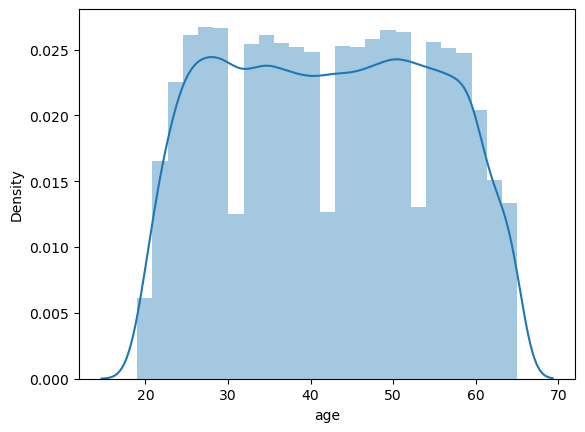

In [10]:
sns.distplot(df['age'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

C:\Users\swati\AppData\Local\Temp\ipykernel_20860\3661541645.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year_of_record'], bins=25)


<Axes: xlabel='year_of_record', ylabel='Density'>

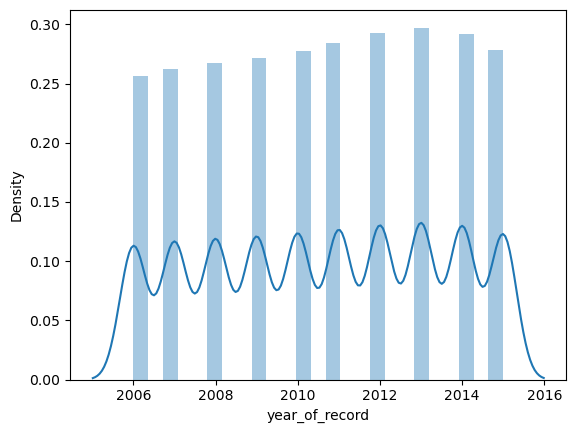

In [11]:
sns.distplot(df['year_of_record'], bins=25)

C:\Users\swati\AppData\Local\Temp\ipykernel_20860\2228541824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['store_number'], bins=25)


<Axes: xlabel='store_number', ylabel='Density'>

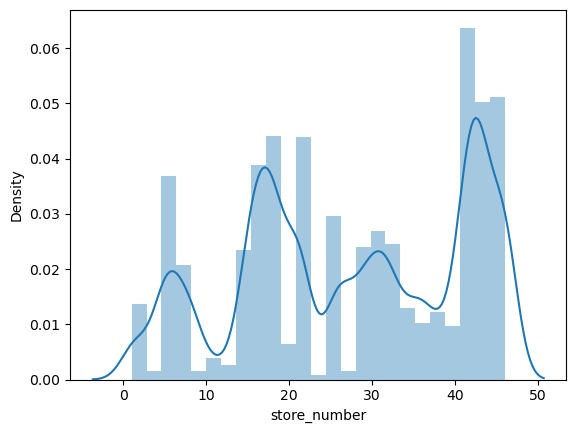

In [12]:
sns.distplot(df['store_number'], bins=25)

C:\Users\swati\AppData\Local\Temp\ipykernel_20860\1212664236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['employ_status_flag'], bins=25)


<Axes: xlabel='employ_status_flag', ylabel='Density'>

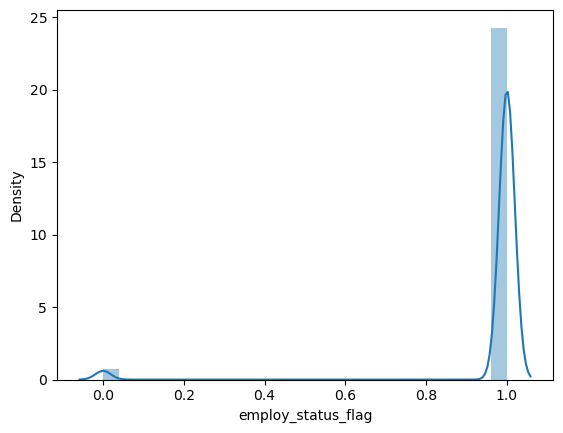

In [13]:
sns.distplot(df['employ_status_flag'], bins=25)

In [14]:
# Create a pivot table with 'city_name' as index and 'employment_status' as columns
pivot_df = df.pivot_table(index='city_name', columns='employment_status', aggfunc='size', fill_value=0)

# Rename the columns
pivot_df.columns = ['ACTIVE', 'TERMINATED']

In [15]:
print(pivot_df)

                 ACTIVE  TERMINATED
city_name                          
Abbotsford          663          18
Aldergrove          509          11
Bella Bella         121           5
Blue River            8           1
Burnaby            2033          34
Chilliwack         1135          32
Cortes Island        37           6
Cranbrook          1752          33
Dawson Creek        111          18
Dease Lake           16           2
Fort Nelson         275          47
Grand Forks         203          33
Kamloops           2000          61
Kelowna            2454          59
Langley             874          27
Nanaimo            3794          82
Nelson              310           7
New Westminster    3351         114
North Vancouver     636          12
Ocean Falls          58           7
Port Coquitlam      530          15
Prince George      1993          55
Princeton           117          19
Quesnel             672          31
Richmond           1373          28
Squamish            784     

In [16]:
#Create another df 
grp_df = df.groupby('city_name').agg({'population':'last'})

In [17]:
# Combining dataframes
df_city= grp_df.merge(pivot_df, on = 'city_name', indicator = True)

In [18]:
df_city

,population,ACTIVE,TERMINATED,_merge
city_name,,,,
Abbotsford,138000,663,18,both
Aldergrove,12007,509,11,both
Bella Bella,1019,121,5,both
Blue River,157,8,1,both
Burnaby,232755,2033,34,both
Chilliwack,82900,1135,32,both
Cortes Island,1035,37,6,both
Cranbrook,20499,1752,33,both
Dawson Creek,12978,111,18,both


In [19]:
df_city.reset_index(inplace=True)

In [20]:
df_city.rename(columns={'index': 'city_name'}, inplace=True)

In [21]:
df_city

,city_name,population,ACTIVE,TERMINATED,_merge
0,Abbotsford,138000,663,18,both
1,Aldergrove,12007,509,11,both
2,Bella Bella,1019,121,5,both
3,Blue River,157,8,1,both
4,Burnaby,232755,2033,34,both
5,Chilliwack,82900,1135,32,both
6,Cortes Island,1035,37,6,both
7,Cranbrook,20499,1752,33,both
8,Dawson Creek,12978,111,18,both
9,Dease Lake,335,16,2,both


In [22]:
grouped_df_1 = df.groupby('employee_id').agg({'length_of_service':'max','age':'max','age_flag':'last','gender':'first','year_of_record':'max','city_name':'first','population':'last','job_title':'last','job_category':'last','Hierarchy':'last','store_number':'last','business_unit':'last','employment_status':'last','employ_status_flag':'last'})

In [23]:
grouped_df_1.head(15)

,length_of_service,age,age_flag,gender,year_of_record,city_name,population,job_title,job_category,Hierarchy,store_number,business_unit,employment_status,employ_status_flag
employee_id,,,,,,,,,,,,,,
1318,26,61,Old_age,Male,2015,Vancouver,2437000,CEO,Board,3,35,HEADOFFICE,ACTIVE,1
1319,26,58,Old_age,Female,2015,Vancouver,2437000,VP Stores,Board,3,35,HEADOFFICE,ACTIVE,1
1320,26,60,Old_age,Female,2015,Vancouver,2437000,Legal Counsel,Employee,0,35,HEADOFFICE,ACTIVE,1
1321,26,56,Old_age,Male,2015,Vancouver,2437000,VP Human Resources,Board,3,35,HEADOFFICE,ACTIVE,1
1322,26,57,Old_age,Male,2015,Vancouver,2437000,VP Finance,Board,3,35,HEADOFFICE,ACTIVE,1
1323,26,53,Old_age,Male,2015,Vancouver,2437000,"Exec Assistant, VP Stores",Executive,2,35,HEADOFFICE,ACTIVE,1
1325,26,51,Old_age,Female,2015,Vancouver,2437000,"Exec Assistant, Legal Counsel",Executive,2,35,HEADOFFICE,ACTIVE,1
1328,26,59,Old_age,Female,2015,Vancouver,2437000,CHief Information Officer,Executive,2,35,HEADOFFICE,ACTIVE,1
1329,26,48,Middle_age,Female,2015,Terrace,12494,Store Manager,Manager,1,32,STORES,ACTIVE,1


In [24]:
grouped_df_1.shape

(6157, 14)

### 3. Data prep for regression analysis

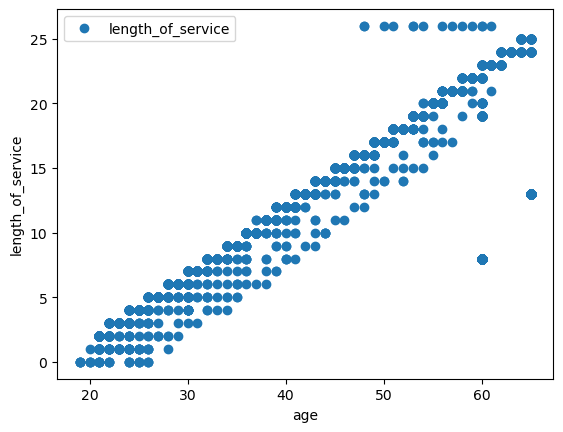

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

grouped_df_1.plot(x ='age', y='length_of_service',style='o') # The style option creates a scatterplot; without it, we only have lines.
  
plt.xlabel('age')  
plt.ylabel('length_of_service')  
plt.show()

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = grouped_df_1['age'].values.reshape(-1,1)
y = grouped_df_1['length_of_service'].values.reshape(-1,1)

In [27]:
X

array([[61],
       [58],
       [60],
       ...,
       [21],
       [21],
       [21]], dtype=int64)

In [28]:
y

array([[26],
       [26],
       [26],
       ...,
       [ 2],
       [ 2],
       [ 2]], dtype=int64)

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

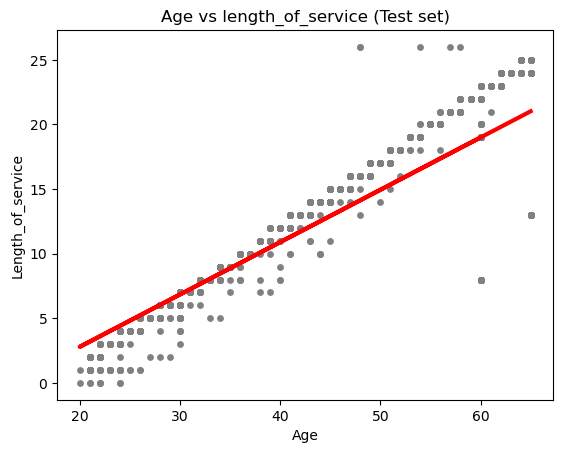

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs length_of_service (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Length_of_service')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.4050409]]
Mean squared error:  12.416935544867203
R2 score:  0.7224887228403086


In [36]:
y_predicted

array([[21.01797836],
       [ 3.60121956],
       [ 6.84154677],
       ...,
       [ 8.05666948],
       [17.77765114],
       [18.99277385]])

In [37]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,13,21.017978
1,2,3.601220
2,7,6.841547
3,6,6.841547
4,25,20.612937
5,1,3.196179
6,4,4.816342
7,7,7.246588
8,13,11.702038
9,8,18.992774


### Compare how the regression fits the training set

In [38]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.4050409]]
Mean squared error:  12.707893510176282
R2 score:  0.7230629513181386


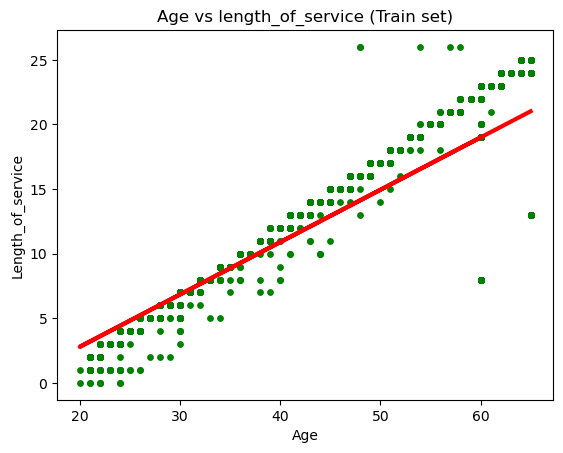

In [41]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs length_of_service (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Length_of_service')
plot_test.show()

##### The models outcome on the training set is very similar to that on the test set.

 ##### Hypothesis : Employees in certain job roles (Hierarchy level) are more likely to leave. 

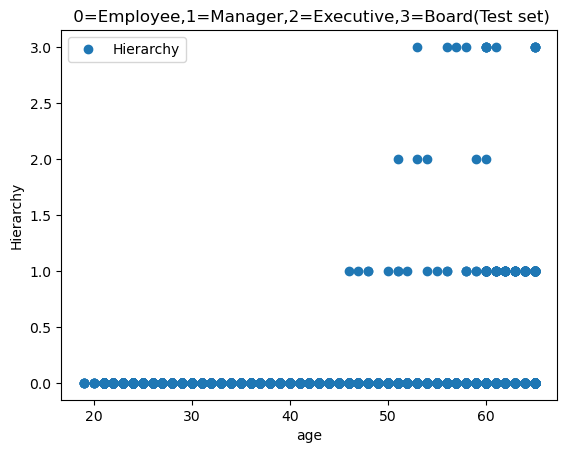

In [42]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

grouped_df_1.plot(x ='age', y='Hierarchy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plot_test.title(' 0=Employee,1=Manager,2=Executive,3=Board(Test set)'
               )  
plt.xlabel('age')  
plt.ylabel('Hierarchy') 
plt.show()

In [43]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['age'].values.reshape(-1,1)
y = df['Hierarchy'].values.reshape(-1,1)

In [44]:
X

array([[52],
       [53],
       [54],
       ...,
       [42],
       [43],
       [44]], dtype=int64)

In [45]:
y

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [46]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [48]:
# Predict the values of y using X.
# Fit the model to the training data
regression.fit(X_train, y_train)
y_predicted = regression.predict(X_test)

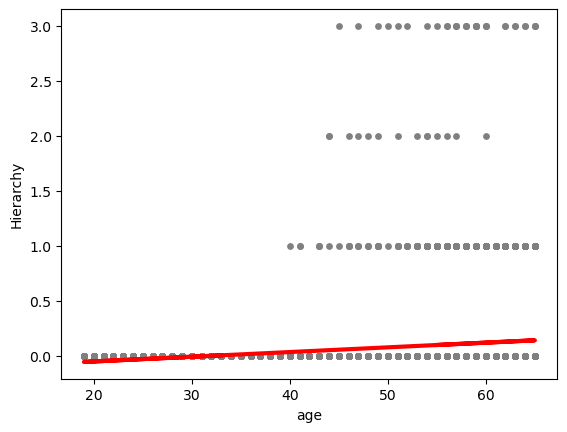

In [49]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)

plot_test.xlabel('age')
plot_test.ylabel('Hierarchy')
plot_test.show()

In [50]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [51]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00427687]]
Mean squared error:  0.05680058915814088
R2 score:  0.0595713977994603


In [52]:
y_predicted

array([[ 0.00352498],
       [-0.00930563],
       [-0.04352059],
       ...,
       [ 0.05057055],
       [ 0.00352498],
       [ 0.09761613]])

In [53]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.003525
1,0,-0.009306
2,0,-0.043521
3,0,0.007802
4,0,-0.000752
5,0,-0.022136
6,0,0.046294
7,0,0.101893
8,0,-0.043521
9,0,0.123277


In [54]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [55]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [56]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00427687]]
Mean squared error:  0.05410256586074396
R2 score:  0.04935327078659635


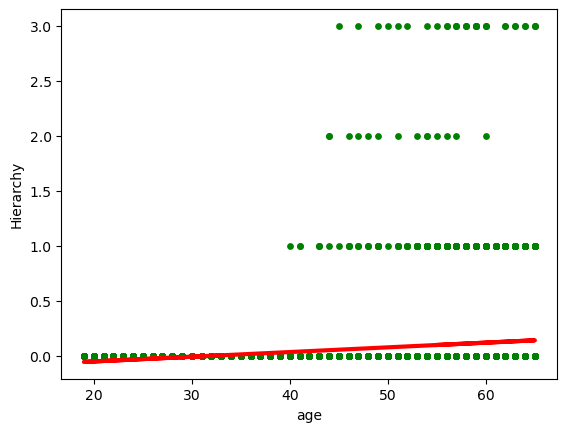

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)

plot_test.xlabel('age')
plot_test.ylabel('Hierarchy')
plot_test.show()

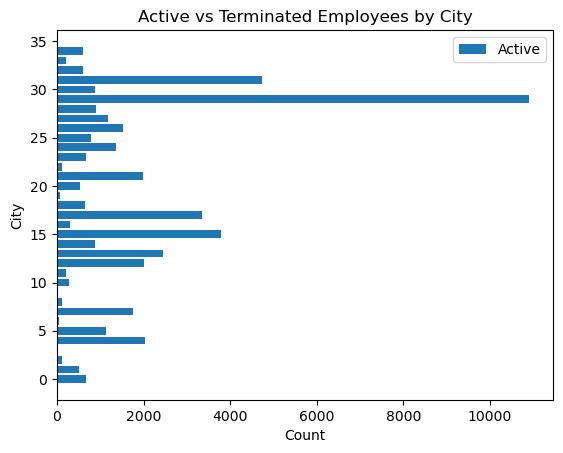

In [64]:
# Create a bar chart
plt.barh(df_city.index, df_city['ACTIVE'], label='Active')
#plt.bar(df_city.index, df_city['TERMINATED'], bottom=df_city['ACTIVE'], label='Terminated')
#plt.bar(df_city.index, df_city['TERMINATED'], label='Terminated')
# Add labels and title
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Active vs Terminated Employees by City')
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=360)

# Show the plot
plt.show()


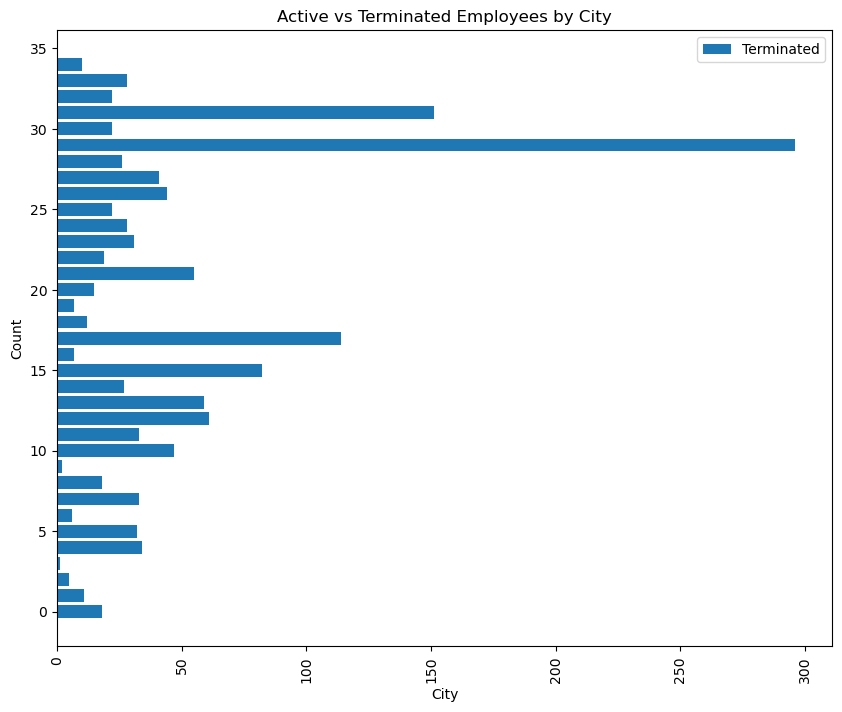

In [60]:
# Create a bar chart
plt.figure(figsize=(10, 8))
#plt.bar(df_city.index, df_city['ACTIVE'], label='Active')
#plt.bar(df_city.index, df_city['TERMINATED'], bottom=df_city['ACTIVE'], label='Terminated')
plt.barh(df_city.index, df_city['TERMINATED'], label='Terminated')
# Add labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Active vs Terminated Employees by City')
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [61]:
# Export new city df
df_city.to_csv(os.path.join(path, '02 Data','Prepared Data', 'employee_city.csv'))